In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


# Collaborative filtering
Collaborative filtering approach builds a model from a user’s past behaviors (items previously purchased or selected and/or numerical ratings given to those items) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that the user may have an interest in.

# Cosine similarity 
It measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. It is often used to measure document similarity in text analysis.

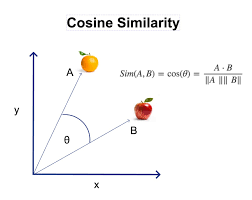

# K nearest neighbors algorithm
KNN does not make any assumptions on the underlying data distribution but it relies on item feature similarity. When KNN makes inference about a book, KNN will calculate the “distance” between the target book and every other book in its database, then it ranks its distances and returns the top K nearest neighbor book as the most similar book recommendations.

# 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("libraries imported..")

libraries imported..


# 2.Load Dataset

In [3]:
df = pd.read_csv("../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv")

# 3. EDA

In [4]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [6]:
df.shape

(550, 7)

In [7]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
545    False
546    False
547    False
548    False
549    False
Length: 550, dtype: bool

# 4.Visualisation

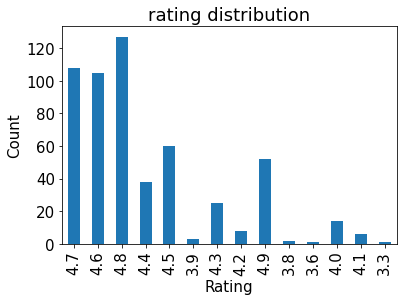

In [9]:
plt.rc('font',size=15)
df['User Rating'].value_counts(sort = False).plot(kind ='bar')
plt.title("rating distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

Maximum rating given by users is **4.8**

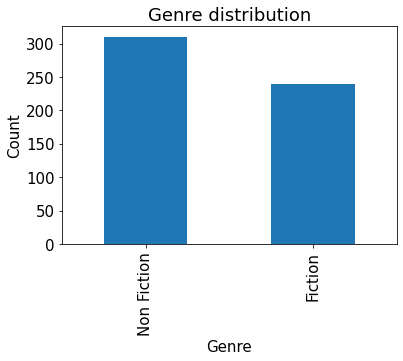

In [10]:
plt.rc('font',size=15)
df['Genre'].value_counts(sort = False).plot(kind ='bar')
plt.title("Genre distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

graph of **genre**

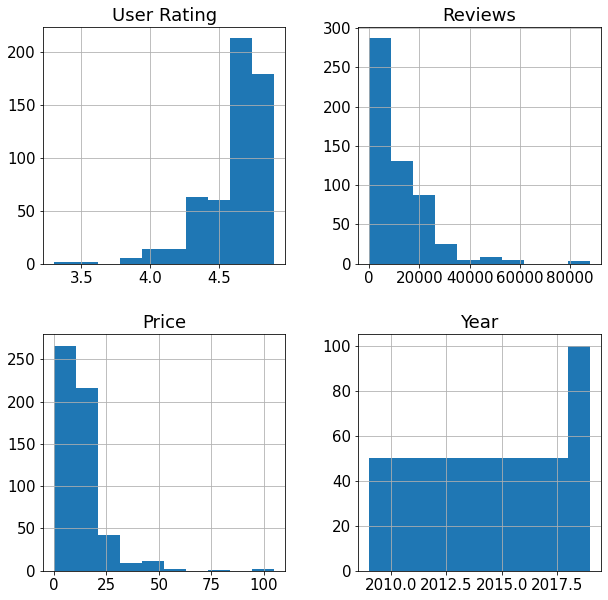

In [11]:
df.hist(figsize = (10,10))
plt.show()

# 5. Some Useful Insights

In [12]:
df[df['Author'] == "Stephen King"]

,Name,Author,User Rating,Reviews,Price,Year,Genre
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
79,Doctor Sleep: A Novel,Stephen King,4.7,15845,13,2013,Fiction
194,Joyland (Hard Case Crime),Stephen King,4.5,4748,12,2013,Fiction
520,Under the Dome: A Novel,Stephen King,4.3,6740,20,2009,Fiction


books of stephen king

In [13]:
df[df['User Rating'] > 3.0]['Name'].value_counts()

Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The Very Hungry Caterpillar                                                      7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
                                                                                ..
Humans of New York : Stories                                                     1
Howard Stern Comes Again                                                         1
Homebody: A Guide to Creating Spaces You Never Want to Leave                     1
Have a Little Faith: A True Story                                                1
Night (Night)                                                                    1
Name: Name, Length: 351, dtype: int64

books having ratings greater than 3.0

In [14]:
print("Maximum reviews",df['Reviews'].max())

Maximum reviews 87841


In [15]:
print("Maximum price of book",df['Price'].max())

Maximum price of book 105


# 6. Recommendation System

In [16]:
ratings =pd.DataFrame(df.groupby('Name')['User Rating'].mean())
ratings.head()

,User Rating
Name,
10-Day Green Smoothie Cleanse,4.7
11/22/63: A Novel,4.6
12 Rules for Life: An Antidote to Chaos,4.7
1984 (Signet Classics),4.7
"5,000 Awesome Facts (About Everything!) (National Geographic Kids)",4.8


In [17]:
ratings['rating_numbers'] = pd.DataFrame(df.groupby('Name')['User Rating'].count())

In [18]:
ratings.head()

,User Rating,rating_numbers
Name,,
10-Day Green Smoothie Cleanse,4.7,1
11/22/63: A Novel,4.6,1
12 Rules for Life: An Antidote to Chaos,4.7,1
1984 (Signet Classics),4.7,1
"5,000 Awesome Facts (About Everything!) (National Geographic Kids)",4.8,1


In [19]:
bookRate = df.pivot_table(index='Name', columns=df.index, values='User Rating')
bookRate.fillna(0, inplace=True)

In [20]:
bookRate.head(10)

,0,1,2,3,4,5,6,7,8,9,...,540,541,542,543,544,545,546,547,548,549
Name,,,,,,,,,,,,,,,,,,,,,
10-Day Green Smoothie Cleanse,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11/22/63: A Novel,0.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Rules for Life: An Antidote to Chaos,0.0,0.0,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984 (Signet Classics),0.0,0.0,0.0,4.7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"5,000 Awesome Facts (About Everything!) (National Geographic Kids)",0.0,0.0,0.0,0.0,4.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Dance with Dragons (A Song of Ice and Fire),0.0,0.0,0.0,0.0,0.0,4.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Gentleman in Moscow: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"A Higher Loyalty: Truth, Lies, and Leadership",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(bookRate)

In [22]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric= 'cosine',algorithm='brute')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [23]:
qi = np.random.choice(bookRate.shape[0])
print(qi)
distances, indices = model.kneighbors(bookRate.iloc[qi,:].values.reshape(1,-1),n_neighbors=6)

137


In [24]:
bookRate.index[qi]

'Instant Pot Pressure Cooker Cookbook: 500 Everyday Recipes for Beginners and Advanced Users. Try Easy and Healthy…'

In [25]:
for i in range(0,len(distances.flatten())):
    if i ==0:
        print("Recommendations for {0}:\n".format(bookRate.index[qi]))
    else:
        print('{0}:{1},with distance of {2}:'.format(i,bookRate.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendations for Instant Pot Pressure Cooker Cookbook: 500 Everyday Recipes for Beginners and Advanced Users. Try Easy and Healthy…:

1:The Day the Crayons Quit,with distance of 1.0:
2:The Confession: A Novel,with distance of 1.0:
3:The Constitution of the United States,with distance of 1.0:
4:The Daily Show with Jon Stewart Presents Earth (The Book): A Visitor's Guide to the Human Race,with distance of 1.0:
5:The China Study: The Most Comprehensive Study of Nutrition Ever Conducted And the Startling Implications for Diet…,with distance of 1.0:


# Conclusion
1. we build collaborative recommendation system for top 50 best books of amazon
2. system is based on ratings and similar ratings are found by cosine similarity method which is memory based approch